# Soccer Data

In [1]:
#Going to import all of the libraries that will be needed to get, manipulate, and plot the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

This function will take as its input a dataframe and will be used to find which columns have any missing values

In [2]:
def Find_Missing_Values(dataframe):
    return dataframe.columns[dataframe.isnull().any()]

This function will take as its input a dataframe and will perform a function to describe the type of data for
column, whether the data are numeric or strings.

In [3]:
def Info_Dataframe(dataframe):
    return dataframe.info()

This function will take as its input a dataframe and output the distribution of the columns with numeric data.
This will be helpful to see if their are any outliers in the data.

In [4]:
def Describe_Data(dataframe):
    return dataframe.describe()

Function has as its inputs a dataframe and a number. The output will display the dataframe with the number
the corresponding to the number of rows. Will be used to give us an idea of what the data looks.

In [5]:
def Check_Data(dataframe, number):
    return dataframe.head(number)

This function will be used whenever I want to plot a boxplot. Will be helpful to see outliers.

In [6]:
def Plot_Boxplot(dataframe):
    return dataframe.plot(kind = "box")

This function takes in a dataframe, a column, a name, and a list of columns. It will output the values for the columns
in the list where the row observation from the column input is the same as the name

In [7]:
def Show_Row(dataframe, column, name, list_columns):
    return dataframe.loc[column == name, list_columns]

My first dataset that I will be looking at will be a dataset about FIFA rankings of international soccer teams from 1993 to 2018. The table will be in a format where it will go month by month and for each month rank in desceding order the highest rank country to the lowest rank country. It will also include other columns such as rank change, total points, and which soccer federation the country is a part of. 

In [8]:
rankings = pd.read_csv("/Users/nicksteil/Desktop/fifa_ranking.csv") #reading in a csv file

In [9]:
Check_Data(rankings,10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [10]:
Find_Missing_Values(rankings) #None of the columns in the dataframe have any missing values

Index([], dtype='object')

In [11]:
Info_Dataframe(rankings)
#The dataframe is comprised of strings, floats, and ints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [12]:
Describe_Data(rankings)

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


Just from looking at the distribution of the data for each column, each column appears to have outliers. I will now show plot some boxplots to get an idea of how many outliers there are.

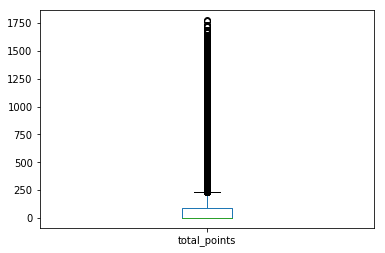

In [13]:
Plot_Boxplot(rankings['total_points'])

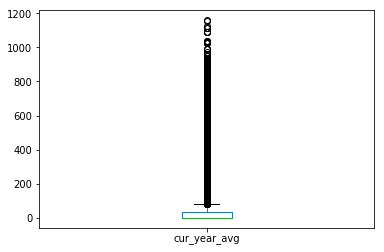

In [14]:
Plot_Boxplot(rankings['cur_year_avg'])

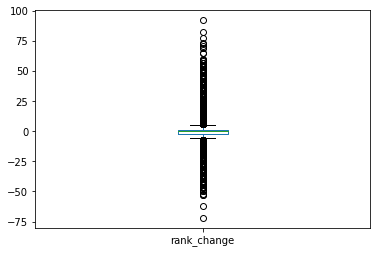

In [15]:
Plot_Boxplot(rankings['rank_change'])

To get an idea of what the outliers may be, I am going to look up at what index that maximum value of a column is
and then look up the observation that corresponds to the index.

In [16]:
max_value = rankings['total_points'].idxmax() #idxmax() returns the index of the max value from column total_points
rankings.iloc[max_value] #iloc[] looks up the observation when given an index number

rank                                1
country_full                  Germany
country_abrv                      GER
total_points                  1775.03
previous_points                  1687
rank_change                         0
cur_year_avg                  1153.12
cur_year_avg_weighted         1153.12
last_year_avg                  559.35
last_year_avg_weighted         279.68
two_year_ago_avg               770.63
two_year_ago_weighted          231.19
three_year_ago_avg             555.23
three_year_ago_weighted        111.05
confederation                    UEFA
rank_date                  2015-06-04
Name: 50014, dtype: object

As we can see, the observation with the highest total points is Germany when they were ranked number one in the world in June 2015. This is also a year after they won the World Cup. This may explain why there total points are so high. It may be the total points are strongly correlated with a team's success shown through their rank. It doesn't make sense to completely neglect the outliers for total points. 

In [17]:
max_value = rankings['cur_year_avg'].idxmax()
rankings.iloc[max_value]

rank                                1
country_full                  Germany
country_abrv                      GER
total_points                  1765.05
previous_points                  1736
rank_change                         0
cur_year_avg                  1158.66
cur_year_avg_weighted         1158.66
last_year_avg                  507.09
last_year_avg_weighted         253.55
two_year_ago_avg               804.67
two_year_ago_weighted           241.4
three_year_ago_avg             557.21
three_year_ago_weighted        111.44
confederation                    UEFA
rank_date                  2014-09-18
Name: 48129, dtype: object

Again Germany, ranked number one just after winning the World Cup, has the maximum current year average. It seems
plausibly that again current year average would be higher when the team is more successful. It doesn't make sense to ignore these outliers either.

While I did not go through each column, it is safe to assume that the columns in our dataframe are positively correlated with team success. This would make sense since when you look at all the nations that participate in international soccer, a very small percentage are significantly better when compared to the rest of the world. These countries are outliers, but it doesn't make sense to simple ignore them since they are reflective of what we are trying to see in the data.

Specifically with this dataset, I want to track the performance of the United States Men's National Team by following their ranking throughout the years in this dataset. 

In [18]:
rankings_USA = rankings[rankings['country_full'] == "USA"].reset_index(drop=True)
#Create a new dataset where we only get the observations for USA. Made sure to reset the index of new dataframe

In [19]:
Check_Data(rankings_USA,10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,28,USA,USA,0.0,43,-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
1,26,USA,USA,0.0,44,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-09-23
2,26,USA,USA,0.0,45,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-10-22
3,27,USA,USA,0.0,44,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-11-19
4,22,USA,USA,0.0,45,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-12-23
5,21,USA,USA,0.0,46,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-02-15
6,21,USA,USA,0.0,46,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-03-15
7,23,USA,USA,0.0,46,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
8,23,USA,USA,0.0,46,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-05-17
9,23,USA,USA,0.0,46,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-06-14


In [20]:
Describe_Data(rankings_USA)

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,20.433566,242.913846,647.433566,-0.003497,121.278217,121.278217,118.675699,59.337657,122.858671,36.857657,127.202797,25.440594
std,7.578418,383.610185,310.879343,3.290068,200.077414,200.077414,195.997248,97.998373,204.395383,61.318805,210.794140,42.158882
min,4.000000,0.000000,42.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,634.250000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,742.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,746.550000,847.000000,1.000000,306.295000,306.295000,308.202500,154.102500,306.767500,92.032500,308.670000,61.737500
max,36.000000,1043.700000,1044.000000,14.000000,695.820000,695.820000,695.820000,347.910000,695.820000,208.750000,695.820000,139.160000


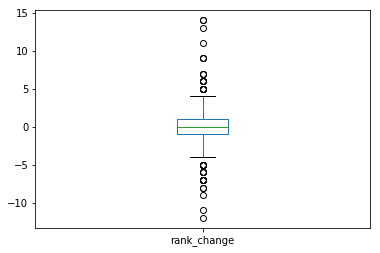

In [21]:
Plot_Boxplot(rankings_USA['rank_change'])

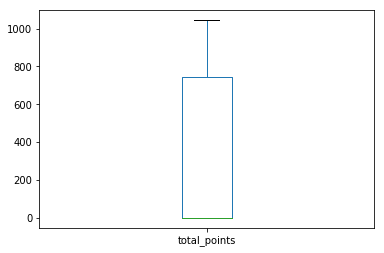

In [22]:
Plot_Boxplot(rankings_USA['total_points'])

When looking at just the US data, the spread of the data for each column seem to have not as many outliers. And this is probably the case when looking at just one country. The data from one country may have some outliers, which is shown by the top boxplot above for the rank change data for the US. But when looking at, for example, total points, there appears to be no outliers. When looking at just the US, I do not want to neglect any of the outliers.

From looking at the rank column for the US, the lowest the US has been ranked is 4 and the highest they have been ranked is 36. I know want to see how many months the US has spent being ranked in the top 10 vs. being ranked higher than 30.

In [23]:
rankings_USA.query("rank <= 10")['rank_date'].count()
#run a query to count the number of dates when the corresponding rank was below 10

33

In [24]:
rankings_USA.query("rank >= 30")['rank_date'].count()
#run a query to count the number of dates when the corresponding rank was above 30

35

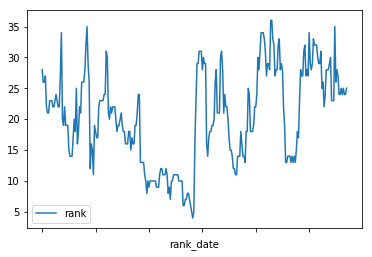

In [25]:
rankings_USA.plot(y ='rank', x = 'rank_date')

This plot tracks the ranking of the US team over time starting from 1993 to 2018. This graph is too noisy. So what
I am going to do is average the rankings across each year. This will take a lot of the noise from the data.

In [26]:
rankings_USA['year'] = pd.DatetimeIndex(rankings_USA['rank_date']).year
#use DatetimeIndex to extract the year from each month of the dates in my data. I created a new column for year.

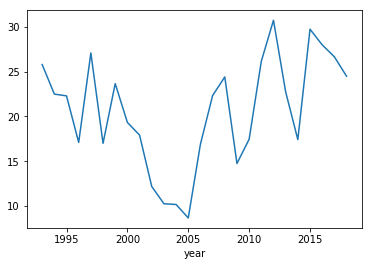

In [27]:
averagerank = rankings_USA.groupby('year')['rank'].mean()
averagerank.plot(y='rank', x='year')
#I group by year then take the average of the rank for the US team

This graph gives us a great picture at how the US has done it terms of its ranking throughout the years. It looks
like during the mid 2000s was when we were at our best.If you look at where we are at right now, we are a little above
our average ranking since 1993. 

# Fire Data

The second dataset that I will be looking at deals with fire data. It is a large database that tracks information of wildfires throughout the US. Fires, the name of the dataset, contains many columns each fire recorded in the dataset, such as how large it was, its longitude and latitude coordintes, the county code where the fire was and many more. This is a SQL data file that is rather large. Instead of uploading all the information from Fires, I am going to use SQL commands to upload the columns I feel are the most interesting for all the fires in the database, such as the year, the size, and which state the fire was in.

In [28]:
conn = sqlite3.connect("/Users/nicksteil/Desktop/FPA_FOD_20170508.sqlite")
wildfires_df = pd.read_sql_query("select FIRE_Year, FIRE_SIZE, STATE from Fires;" , conn)
#This is the syntax to be used to read in a SQL file

In [29]:
Check_Data(wildfires_df,14)

,FIRE_YEAR,FIRE_SIZE,STATE
0,2005,0.10,CA
1,2004,0.25,CA
2,2004,0.10,CA
3,2004,0.10,CA
4,2004,0.10,CA
5,2004,0.10,CA
6,2004,0.10,CA
7,2005,0.80,CA
8,2005,1.00,CA
9,2004,0.10,CA


In [30]:
Find_Missing_Values(wildfires_df)

Index([], dtype='object')

This is a very clean dataset since none of the columns have any missing values.

In [31]:
Info_Dataframe(wildfires_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 3 columns):
FIRE_YEAR    int64
FIRE_SIZE    float64
STATE        object
dtypes: float64(1), int64(1), object(1)
memory usage: 43.0+ MB


I notice that the year is an integer. I am going to want to cast all the years as strings.

In [32]:
wildfires_df['FIRE_YEAR'] = wildfires_df['FIRE_YEAR'].astype('str') #use .astype function to convert to a string
Info_Dataframe(wildfires_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 3 columns):
FIRE_YEAR    object
FIRE_SIZE    float64
STATE        object
dtypes: float64(1), object(2)
memory usage: 43.0+ MB


In [33]:
wildfires_df['FIRE_YEAR'].unique()

array(['2005', '2004', '2006', '2008', '2002', '2007', '2009', '2001',
       '2003', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

The list above are all of the unique years in the dataset. The dataset includes all years from 1992 to 2015.

In [34]:
wildfires_df['STATE'].unique()

array(['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI'], dtype=object)

All fifty states are included as well as DC in the dataset. There are no abbreviations that appear incorrect.

In [35]:
Describe_Data(wildfires_df)

,FIRE_SIZE
count,1.880465e+06
mean,7.452016e+01
std,2.497598e+03
min,1.000000e-05
25%,1.000000e-01
50%,1.000000e+00
75%,3.300000e+00
max,6.069450e+05


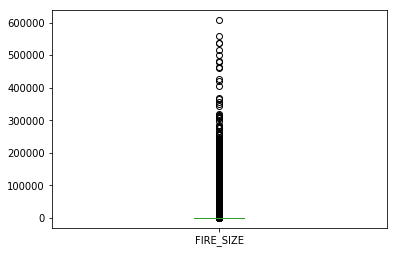

In [36]:
Plot_Boxplot(wildfires_df)

Looking at the summary statistics of fire size and the boxplot, there are many outliers. But this is the case when we look at all the states together. Fires out west, like in California, are going to be much larger than fires on the East Coast. This is just like in the soccer example that when we look state by state, we would not see many outliers when we just take an individual state. Another thing that needs to be considered is that very small fires are taken into account. Thus the distribution is heavily skewed to the right, which is shown by our violin plot.

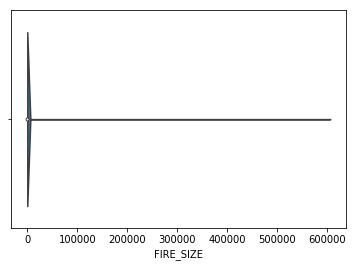

In [37]:
sns.violinplot(wildfires_df['FIRE_SIZE'])

I want to check if this heavily skewed distribution appears only when I have one state. I am going to use California.

In [38]:
california = Show_Row(wildfires_df,wildfires_df['STATE'], 'CA', list(wildfires_df))

In [39]:
Describe_Data(california)

,FIRE_SIZE
count,189550.000000
mean,67.242725
std,2029.960435
min,0.001000
25%,0.100000
50%,0.250000
75%,1.000000
max,315578.800000


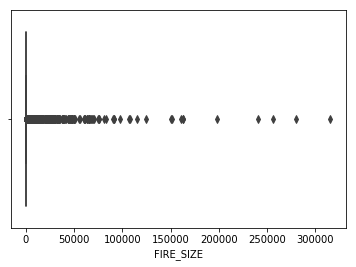

In [40]:
sns.boxplot(california.FIRE_SIZE)

When just looking at data from california, it is still heavily skewed to the right

In [41]:
california['bins'] = pd.qcut(california['FIRE_SIZE'],4) #used .qcut to cut the fire sizes from california into 
california['bins'].value_counts()                       #quartiles

(0.0, 0.1]         82724
(0.25, 1.0]        51678
(1.0, 315578.8]    39563
(0.1, 0.25]        15585
Name: bins, dtype: int64

What I did right here was I cut the distribution of fire size into four quartiles. They ranges of these quartiles are the column on the left. And then I counted how many oberservations fall into each quartile. About 20 percent of the fires in california in the dataset are greater than 1 (I am assuming the units are acres). Whether I only focus on just large fires depends on what kinds of questions I want to answer and if my population of interest are large fires in general. For my purposes I want to focus on large wildfires since they pose a my bigger threat to society.

In [42]:
california = california.query("FIRE_SIZE > 321")

After playing around to where the best place to look at larger fires, I decided to keep as observations only the fires that were bigger than the mean size of California. I did the same .qcut and there are similar counts of fire size in each of the quartile bins. But we can still see in the violin plot that the distribution of fire sizes for California are still heavily skewed right even after we keep larger than average fires.

In [43]:
california['bins'] = pd.qcut(california['FIRE_SIZE'],4)
california['bins'].value_counts()

(321.999, 540.0]       541
(3127.75, 315578.8]    540
(1081.0, 3127.75]      539
(540.0, 1081.0]        538
Name: bins, dtype: int64

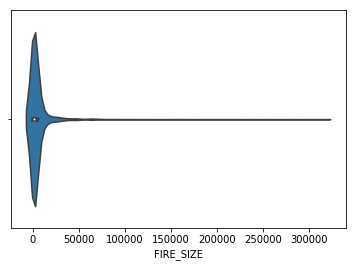

In [44]:
sns.violinplot(california.FIRE_SIZE)

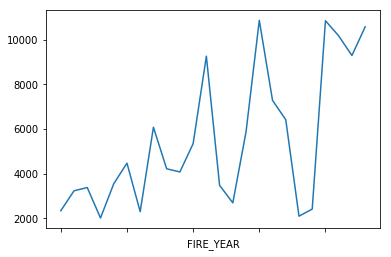

In [51]:
california_averages = california.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()
california_averages.plot(y= 'FIRE_SIZE', x= 'FIRE_YEAR')

This graph shows us the over the last 25 years the average size of fires in California, when only accounting for fires above the average size of all fires in the state throughout the years, has gone up each year.

# Election 2016 Data

For this portion, the dataset that I will be looking at involves data from the 2016 election. The dataset contains
data from each county looking at the number of people that voted Democrat, Republican or other. It also looks at voting patterns from the previous three elections. There is also data about the labor force number in each county as well as their unemployment rate.

In [55]:
election_data = pd.read_excel("/Users/nicksteil/Desktop/election1216.xlsx") #reading in an excel file

In [56]:
Check_Data(election_data,10) #to see what the data looks like

,fips_code,county,st,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,...,exports_2012,pop_2012,exports_2013,pop_2013,exports_2014,pop_2014,exports_2015,pop_2015,exports_2016,pop_2016
0,1001,"Autauga County, Alabama",AL,23641,6093,17403,145,23909,6354,17366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003,"Baldwin County, Alabama",AL,81413,19386,61271,756,84988,18329,65772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005,"Barbour County, Alabama",AL,11630,5697,5866,67,11459,5873,5539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007,"Bibb County, Alabama",AL,8644,2299,6262,83,8391,2200,6131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1009,"Blount County, Alabama",AL,24267,3522,20389,356,23980,2961,20741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1011,"Bullock County, Alabama",AL,5415,4011,1391,13,5318,4058,1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1013,"Butler County, Alabama",AL,9709,4188,5485,36,9483,4367,5081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1015,"Calhoun County, Alabama",AL,49242,16334,32348,560,46240,15500,30272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1017,"Chambers County, Alabama",AL,14956,6799,8067,90,14562,6853,7596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1019,"Cherokee County, Alabama",AL,9745,2306,7298,141,9761,2126,7494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
Find_Missing_Values(election_data)

Index(['labor_force_13', 'labor_force_16', 'u_rate_13', 'u_rate_16',
       'avg_total_wages_13', 'avg_total_wages_16', 'avg_pm_wages_13',
       'avg_pm_wages_16', 'exports_2012', 'pop_2012', 'exports_2013',
       'pop_2013', 'exports_2014', 'pop_2014', 'exports_2015', 'pop_2015',
       'exports_2016', 'pop_2016'],
      dtype='object')

From the previous function, there are a lot of columns with missing data. When looking at the actually dataset specifically the columns from exports_12 to pop_2016, a small percentage of these columns actually have data.

In [58]:
 1 - (election_data['pop_2012'].isnull().sum() / len(election_data['pop_2012']))
#take the count of the rows with missing data in pop_2012 and divide it by the length of the column

0.10700514138817485

For example, in the column pop_2012 only 10 percent of the counties had data for their population in 2012. When looking at the entire dataset, it appears that as a general rule either the county has all of the data for the columns from exports_12 to pop_2016 or they all are missing, with a small number of exceptions. Since I can't gleam much information from the columns that I do have data, I will choose to keep these columns with missing data. For example, it would be hard to project the population of a county with just their voter turnout. 

I now focus on filling the missing data where we have a lot of data, but a few rows have missing data in different
columns.

In [59]:
election_data.groupby('st')['labor_force_13'].mean()
#groupby state and then take the mean of labor force in 2013

st
AL     32364.432836
AR     17445.173333
AZ    202445.666667
CA    321111.741379
CO     43369.937500
CT    233602.875000
DC              NaN
DE    147498.333333
FL    141032.388060
GA     29926.911950
HI    162387.500000
IA     17246.072165
ID     17543.090909
IL     64265.333333
IN     34684.456522
KS     14161.142857
KY     17145.658333
LA     32891.515625
MA    250793.928571
MD    121943.476190
ME     44210.125000
MI     56959.445783
MN     33968.712644
MO     26282.860870
MS     15484.390244
MT      9147.250000
NC     46817.140000
ND      7679.452830
NE     10949.086022
NH     74202.700000
NJ    215802.857143
NM     27987.151515
NV     81302.647059
NY    155211.080645
OH     64946.170455
OK     23455.324675
OR     52971.944444
PA     96148.223881
RI    111423.400000
SC     47702.543478
SD      6785.153846
TN     32342.368421
TX     50878.102767
UT     48567.379310
VA     31853.924812
VT     25089.642857
WA     88774.512821
WI     42814.347222
WV     14512.309091
WY     13319.3478

In [60]:
list1 = ['labor_force_13', 'labor_force_16', 'u_rate_13', 'u_rate_16', 'avg_total_wages_13',
        'avg_total_wages_16', 'avg_pm_wages_13', 'avg_pm_wages_16']
#make of list of columns that have missing values and I want them to be filled

In [61]:
Show_Row(election_data, election_data['st'], "DC", list1)
#extacting the data from columns from the list above and only want the DC obsevation

,labor_force_13,labor_force_16,u_rate_13,u_rate_16,avg_total_wages_13,avg_total_wages_16,avg_pm_wages_13,avg_pm_wages_16
290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the groupby performed above, DC does not have data for labor_force_2013. When looking at the rest of their data for the list of columns that have missing data, for DC all have missing data. This a unique case that needs to be addressed. In order to fill the missing data for DC, I will take the average of all the rows for a given column and use that the fill the DC data for that column. That might not be the best approach. I better might be to use the data of a county that is similar in characteristics like population size and similar political demographics. But since this is just one country out of more than 3000, if should not drastically change our analysis.

In [62]:
for column in list1:
    election_data.loc[election_data['st'] == 'DC',column] = election_data[column].mean()
#Run a for loop across the list of columns with missing variables. Use .loc to locate the row and column that
#I want to be replaced with the mean of each column as it goes throguh the loop.

In [63]:
Show_Row(election_data, election_data['st'], "DC", list1)
#For DC, filling the missing data worked

,labor_force_13,labor_force_16,u_rate_13,u_rate_16,avg_total_wages_13,avg_total_wages_16,avg_pm_wages_13,avg_pm_wages_16
290,49662.287693,50664.127776,7.358119,5.222755,36434.271585,38820.460129,45823.209724,48916.517078


From the extraction above, all of the missing data for DC has been filled. Now to address the other counties that have missing data, I am going to replace the missing values with the average of the data that I have from the other counties that belong in the same state. There is less variation when looking at a single state than across the entire US, and their average would be more likely closer to the true value that is missing. As an example we are going to look at Delaware. 

In [64]:
Show_Row(election_data, election_data['st'], "DE", list1)
#These are the data from the three counties of Delaware from the list of columns that have missing values

,labor_force_13,labor_force_16,u_rate_13,u_rate_16,avg_total_wages_13,avg_total_wages_16,avg_pm_wages_13,avg_pm_wages_16
287,73779.0,77541.0,7.4,4.7,38575.0,41675.0,47101.0,50598.0
288,276512.0,295092.0,6.5,4.3,58939.0,59992.0,NaN,NaN
289,92204.0,100044.0,6.9,4.4,35217.0,38546.0,38840.0,42090.0


In [65]:
for column in list1:
    election_data[column].fillna(election_data.groupby("st")[column].transform("mean"), inplace = True)
    
#Run a for loop across the list of columns with missing values. I group by state. I use .tranform to calucate the mean
#across each state. .transform returns a list of the means the same length as the column. I set inplace = True
#so that it replace the original data with outputs of the .transform function. I only fill the missing values with
#the means from the .transform function.

In [66]:
Show_Row(election_data, election_data['st'], "DE", list1)
#I was able to fill the missing values with the averages from the other counties in Delaware.

,labor_force_13,labor_force_16,u_rate_13,u_rate_16,avg_total_wages_13,avg_total_wages_16,avg_pm_wages_13,avg_pm_wages_16
287,73779.0,77541.0,7.4,4.7,38575.0,41675.0,47101.0,50598.0
288,276512.0,295092.0,6.5,4.3,58939.0,59992.0,42970.5,46344.0
289,92204.0,100044.0,6.9,4.4,35217.0,38546.0,38840.0,42090.0


In [67]:
Find_Missing_Values(election_data)

Index(['exports_2012', 'pop_2012', 'exports_2013', 'pop_2013', 'exports_2014',
       'pop_2014', 'exports_2015', 'pop_2015', 'exports_2016', 'pop_2016'],
      dtype='object')

Now I can see that the only columns that I am interested in do not have any missing values. Only the columns that were previously mentioned will keep having missing values.

In [68]:
Info_Dataframe(election_data) # data is a combination of numerical and categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 33 columns):
fips_code             3112 non-null int64
county                3112 non-null object
st                    3112 non-null object
total_2008            3112 non-null int64
dem_2008              3112 non-null int64
gop_2008              3112 non-null int64
oth_2008              3112 non-null int64
total_2012            3112 non-null int64
dem_2012              3112 non-null int64
gop_2012              3112 non-null int64
oth_2012              3112 non-null int64
total_2016            3112 non-null int64
dem_2016              3112 non-null int64
gop_2016              3112 non-null int64
oth_2016              3112 non-null int64
labor_force_13        3112 non-null float64
labor_force_16        3112 non-null float64
u_rate_13             3112 non-null float64
u_rate_16             3112 non-null float64
avg_total_wages_13    3112 non-null float64
avg_total_wages_16    3112 non-null float

In [69]:
Describe_Data(election_data)

,fips_code,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,...,exports_2012,pop_2012,exports_2013,pop_2013,exports_2014,pop_2014,exports_2015,pop_2015,exports_2016,pop_2016
count,3112.000000,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3.112000e+03,...,2.780000e+02,3.330000e+02,2.850000e+02,3.330000e+02,2.790000e+02,3.330000e+02,2.710000e+02,3.330000e+02,2.760000e+02,3.330000e+02
mean,30651.700514,4.215395e+04,2.231125e+04,19207.531491,587.632391,3.950556e+04,1.999004e+04,18890.392352,625.129820,4.089631e+04,...,3.118923e+09,4.563967e+05,3.340438e+09,4.606559e+05,3.364063e+09,4.650508e+05,3.172293e+09,4.692372e+05,3.070583e+09,4.730744e+05
std,14984.654885,1.199957e+05,7.715532e+04,44866.795361,1846.444842,1.056297e+05,6.599190e+04,41731.449644,1839.801275,1.082522e+05,...,6.584405e+09,8.350497e+05,8.606189e+09,8.424383e+05,8.618321e+09,8.494471e+05,7.422868e+09,8.559415e+05,6.780422e+09,8.608276e+05
min,1001.000000,7.900000e+01,8.000000e+00,67.000000,0.000000,6.400000e+01,5.000000e+00,54.000000,0.000000,6.400000e+01,...,2.493050e+05,3.351000e+03,6.621500e+04,3.331000e+03,5.710790e+05,3.243000e+03,8.890600e+04,3.425000e+03,1.515510e+05,4.053000e+03
25%,19038.500000,4.973500e+03,1.806250e+03,2881.250000,70.000000,4.765750e+03,1.555000e+03,2889.750000,70.000000,4.815000e+03,...,1.262675e+08,5.656100e+04,1.293064e+08,5.674000e+04,1.405780e+08,5.674200e+04,1.533585e+08,5.697100e+04,1.354469e+08,5.756500e+04
50%,29208.000000,1.104050e+04,4.499000e+03,6312.000000,169.000000,1.073250e+04,3.948500e+03,6393.500000,168.000000,1.092950e+04,...,6.752224e+08,1.661010e+05,6.275383e+08,1.674760e+05,6.853059e+08,1.677000e+05,7.123738e+08,1.681680e+05,7.081640e+08,1.681830e+05
75%,46005.500000,2.906525e+04,1.238600e+04,16036.000000,441.000000,2.762825e+04,1.110025e+04,15948.750000,462.250000,2.866450e+04,...,3.558924e+09,5.513410e+05,3.141356e+09,5.558970e+05,3.063419e+09,5.621760e+05,2.960776e+09,5.638370e+05,3.390163e+09,5.683460e+05
max,56045.000000,3.318248e+06,2.295853e+06,956425.000000,65970.000000,2.427869e+06,1.672164e+06,699600.000000,56105.000000,2.314275e+06,...,5.101228e+10,9.953555e+06,9.619538e+10,1.001544e+07,9.995487e+10,1.006662e+07,8.016155e+10,1.011226e+07,6.824714e+10,1.013792e+07


With the data cleaned, I can now go through the process of determining outliers and perform similar analyis as done in the previous two examples to see what I can do with these outliers when looking across all counties around the country. It seems reasonable to assume that more populous counties would see more totals in all voting categories. We can see from the scatter plot that there is a positive correlation with the size of the labor force in a county and voter turnout.

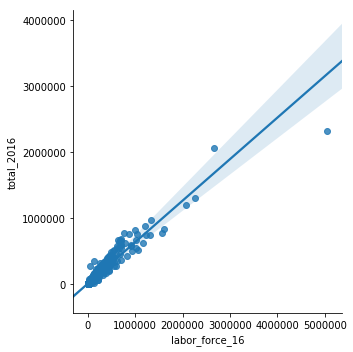

In [78]:
sns.lmplot(x="labor_force_16", y="total_2016", data=election_data)

There are many more kinds of questions going forward that we can answer now that we have clean data.